In [12]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf

# Define parameters
Fo = 0.5
nx = 100
nt = 100
m_per_km = 1000
L = 100*m_per_km
mm_per_m = 1000
kappa = 1.*mm_per_m*mm_per_m # thermal diffusivity 1 mm^2/s converted to m^2/s
T_hot = 1600
T_ocean = 0.

# Define domain and create Temperature array, and set timesteps
dx = nx/L
dt = Fo*dx**2 / kappa
x = np.arange(nx)*dx/m_per_km
secs_per_year = 60*60*24*365
t = np.arange(nt)*dt/secs_per_year
T = np.zeros([nt, nx])

# Set initial condition
T[0,:] = T_hot
# Set boundary conditions
T[:,0] = T_ocean
T[:,-1] = T_hot

# Solve for temperature in loop
for n in np.arange(nt-1):
    T[n+1,1:-1] = Fo*T[n,2:] + (1 - 2*Fo)*T[n,1:-1] + Fo*T[n,0:-2]

# Calculate analytical solution
def T_ana(n):
    j = np.arange(nx)
    return T_ocean + (T_hot - T_ocean)*erf(0.5*np.sqrt(j**2/(Fo*n)))

In [10]:
def plot_T_profile(n):
    plt.plot(x, T[n,:])
    plt.plot(x, T_ana(n), '--')
    plt.xlabel('Depth (km)')
    plt.ylabel('Temperature (C)')

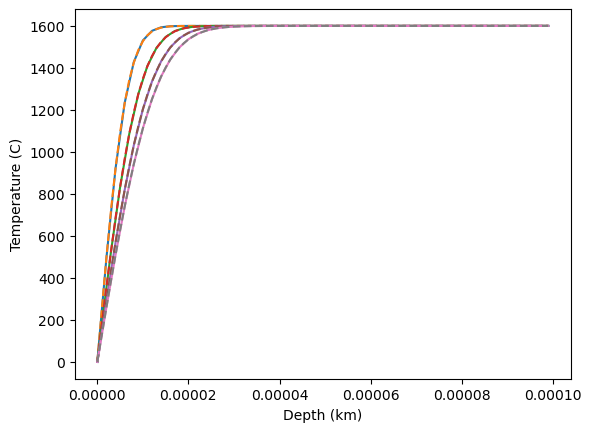

In [13]:
plot_T_profile(25)
plot_T_profile(50)
plot_T_profile(75)
plot_T_profile(95)
